# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("01_source/tabula_ch/tabula_lauf_sandlaufkaefer.csv")

In [3]:
df.head()

,ORDER,FAMILY,scientific name,N,S,CH,Bemerkungen
0,COLEOPTERA (KÄFER),Cicindelidae (Sandlaufkäfer),Cicindela arenaria Fuesslin,1,1,1,"breite, sandige Flussufer"
1,COLEOPTERA (KÄFER),Cicindelidae (Sandlaufkäfer),C. flexuosa Fabr.,-,0,0,"sandige Seeufer, Genf"
2,COLEOPTERA (KÄFER),Cicindelidae (Sandlaufkäfer),C. germanica L.,1,2,2,Trockenrasen
3,COLEOPTERA (KÄFER),Cicindelidae (Sandlaufkäfer),C. silvatica L.,-,0,0,sandige Kiefernwälder
4,COLEOPTERA (KÄFER),Carabidae (Laufkäfer),Abax oblongus Dejean,-,1,1,"Endemit, Sottoceneri"


In [4]:
len (df)

204

In [5]:
df.pop("N")
df.pop("S")

0        1
1        0
2        2
3        0
4        1
5        1
6        4
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
      ... 
174    NaN
175    NaN
176    NaN
177    NaN
178    NaN
179    NaN
180    NaN
181    NaN
182    NaN
183    NaN
184    NaN
185    NaN
186    NaN
187    NaN
188    NaN
189    NaN
190    NaN
191    NaN
192    NaN
193    NaN
194    NaN
195    NaN
196    NaN
197    NaN
198    NaN
199    NaN
200    NaN
201    NaN
202    NaN
203    NaN
Name: S, Length: 204, dtype: object

In [6]:
df.head(2)

,ORDER,FAMILY,scientific name,CH,Bemerkungen
0,COLEOPTERA (KÄFER),Cicindelidae (Sandlaufkäfer),Cicindela arenaria Fuesslin,1,"breite, sandige Flussufer"
1,COLEOPTERA (KÄFER),Cicindelidae (Sandlaufkäfer),C. flexuosa Fabr.,0,"sandige Seeufer, Genf"


In [7]:
df.rename(columns={"ORDER": "order", "FAMILY": "family", "scientific name": "sc name","CH":"ch cat", "Bemerkungen":"bemerkungen"},inplace=True)

In [8]:
df.head(1)

,order,family,sc name,ch cat,bemerkungen
0,COLEOPTERA (KÄFER),Cicindelidae (Sandlaufkäfer),Cicindela arenaria Fuesslin,1,"breite, sandige Flussufer"


In [9]:
df['einteilung'] = 'Insekten'
df['untergruppe'] = 'Laufkäfer'

In [10]:
df.head()

,order,family,sc name,ch cat,bemerkungen,einteilung,untergruppe
0,COLEOPTERA (KÄFER),Cicindelidae (Sandlaufkäfer),Cicindela arenaria Fuesslin,1,"breite, sandige Flussufer",Insekten,Laufkäfer
1,COLEOPTERA (KÄFER),Cicindelidae (Sandlaufkäfer),C. flexuosa Fabr.,0,"sandige Seeufer, Genf",Insekten,Laufkäfer
2,COLEOPTERA (KÄFER),Cicindelidae (Sandlaufkäfer),C. germanica L.,2,Trockenrasen,Insekten,Laufkäfer
3,COLEOPTERA (KÄFER),Cicindelidae (Sandlaufkäfer),C. silvatica L.,0,sandige Kiefernwälder,Insekten,Laufkäfer
4,COLEOPTERA (KÄFER),Carabidae (Laufkäfer),Abax oblongus Dejean,1,"Endemit, Sottoceneri",Insekten,Laufkäfer


In [11]:
df["ch cat"].value_counts()

4    65
1    45
3    33
2    32
0    29
Name: ch cat, dtype: int64

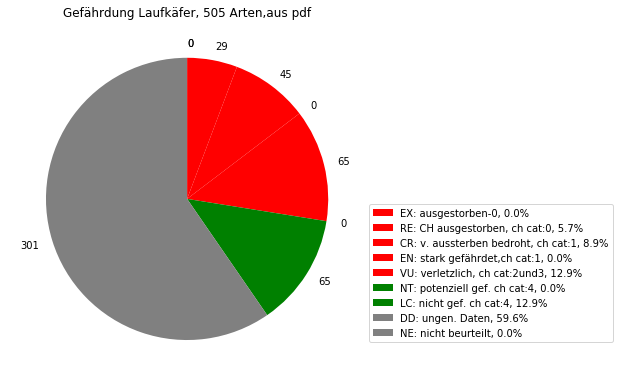

In [12]:
values = [0, 29, 45, 0, 65, 0, 65, 301, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben-0', 'RE: CH ausgestorben, ch cat:0',
    'CR: v. aussterben bedroht, ch cat:1', 'EN: stark gefährdet,ch cat:1', 
    'VU: verletzlich, ch cat:2und3',"NT: potenziell gef. ch cat:4",
    "LC: nicht gef. ch cat:4","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Laufkäfer, 505 Arten,aus pdf')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()